## Comparison of Random Forest and K-Nearest Neighbor Algorithms for Classifying Dry Beans
Carmela Nova N. Edig

### The following code trains and validates the dataset with the Random Forest Classifier and K-Nearest Neighbors Classifier with $10-$fold cross-validation. Then the accuracy of RFC and KNN for each iteration is printed in a table, followed by their averages.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading dataset from UCI Machine Learning Repository
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df = df.sample(n=13610)

# Defining the features and target variables
X = df[['Area', 'Perimeter', 'MajorAxisLength',
        'MinorAxisLength', 'AspectRation', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
        'roundness', 'Compactness', 'ShapeFactor1',
        'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']]
y = df['Class']

# Training the Random Forest Classifier
rfc = RandomForestClassifier()
rfc_scores = cross_val_score(rfc, X, y, cv=10)

# Training the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X, y, cv=10)

# Creating a dataframe to store the results
results_df = pd.DataFrame(columns=['iteration', 'RFC_accuracy', 'KNN_accuracy', 'difference'])

# Filling the dataframe with the results
for i in range(10):
    results_df = results_df.append({'iteration': i+1, 'RFC_accuracy': rfc_scores[i], 'KNN_accuracy': knn_scores[i], 'difference': rfc_scores[i]-knn_scores[i]}, ignore_index=True)
    
# Printing the table of accuracy
print(results_df)

# Printing the average accuracy for each classifier
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (rfc_scores.mean(), rfc_scores.std() * 2))
print("K-Nearest Neighbors Classifier Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

   iteration  RFC_accuracy  KNN_accuracy  difference
0        1.0      0.464023      0.295888    0.168135
1        2.0      0.700955      0.307862    0.393093
2        3.0      0.775165      0.324761    0.450404
3        4.0      0.950037      0.218222    0.731815
4        5.0      0.968406      0.121234    0.847171
5        6.0      0.955915      0.103600    0.852314
6        7.0      0.717855      0.091844    0.626010
7        8.0      0.710507      0.067597    0.642910
8        9.0      0.692138      0.055841    0.636297
9       10.0      0.354886      0.159442    0.195445
Random Forest Classifier Accuracy: 0.73 (+/- 0.39)
K-Nearest Neighbors Classifier Accuracy: 0.17 (+/- 0.20)


### Plotting the results in a line graph:

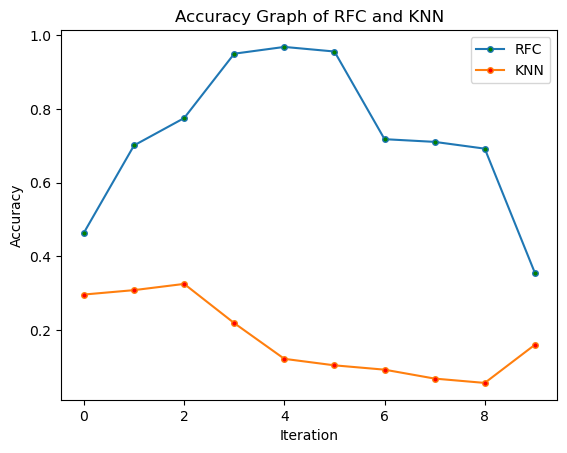

In [2]:
# importing package
import matplotlib.pyplot as plt

# create data
x = list(range(0,10))
y = rfc_scores
z = knn_scores

# x-axis label
plt.xlabel('Iteration')
# frequency label
plt.ylabel('Accuracy')
# plot title
plt.title('Accuracy Graph of RFC and KNN')
plt.plot(x, y, label = "RFC", marker='o', markerfacecolor='green', markersize=4)
plt.plot(x, z, label = "KNN", marker='o', markerfacecolor='red', markersize=4)
plt.legend()
plt.show()


### Using the computed accuracy differences for Nadeau and Bengio's corrected paired Student's t-test to obtain the p-value:

In [3]:
from scipy.stats import t
import numpy as np

#Compute the difference between the results
diff = [y - x for y, x in zip(rfc_scores, knn_scores)]
#Compute the mean of differences
d_bar = np.mean(diff)
#compute the variance of differences
sigma2 = np.var(diff)
#compute the number of data points used for training 
n1 = 9*(df.shape[0])/10
#compute the number of data points used for validating
n2 = (df.shape[0])/10
#compute the total number of data points
n = df.shape[0]
#compute the modified variance
sigma2_mod = sigma2 * (1/n + n2/n1)
#compute the t_static
t_static =  d_bar / np.sqrt(sigma2_mod)


#Compute p-value and plot the results 
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
print("p-value:", Pvalue)

p-value: 9.048317650695026e-11


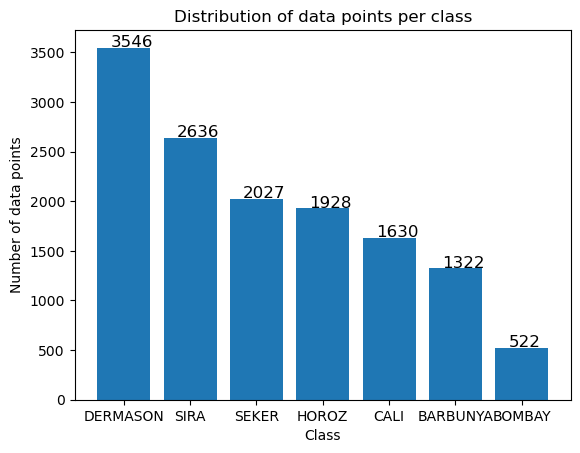

In [16]:
import matplotlib.pyplot as plt

# Count the number of data points per class
class_counts = df['Class'].value_counts()

# Plot the distribution of data points per class
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of data points')
plt.title('Distribution of data points per class')

# Add the number of data points per class as a label on top of each bar
for i in range(len(class_counts)):
    plt.text(x = i-0.2 , y = class_counts.values[i]+10, s = class_counts.values[i], size = 12)

plt.show()

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading dataset from UCI Machine Learning Repository
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df = df.sample(n=13610)

# Defining the features and target variables
X = df[['Area', 'Perimeter', 'MajorAxisLength',
        'MinorAxisLength', 'AspectRation', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
        'roundness', 'Compactness', 'ShapeFactor1',
        'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']]
y = df['Class']

# Define the number of folds
n_folds = 10

# Define the KFold object
kf = KFold(n_splits=n_folds)

# Creating a dataframe to store the results
results_df = pd.DataFrame(columns=['iteration', 'RFC_accuracy', 'KNN_accuracy', 'difference'])

# Loop through the folds
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Get the train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest Classifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    rfc_accuracy = rfc.score(X_test, y_test)
    
    # Train the K-Nearest Neighbors Classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_accuracy = knn.score(X_test, y_test)
    
    # Append the results to the dataframe
    results_df = results_df.append({'iteration': i+1, 'RFC_accuracy': rfc_accuracy, 'KNN_accuracy': knn_accuracy, 'difference': rfc_accuracy-knn_accuracy}, ignore_index=True)
    
# Printing the table of accuracy
print(results_df)
rfc_mean_accuracy = np.mean(rfc_accuracy)
knn_mean_accuracy = np.mean(knn_accuracy)

# Printing the average accuracy
print("Random Forest Classifier Mean Accuracy:", rfc_mean_accuracy)
print("K-Nearest Neighbors Classifier Mean Accuracy:", knn_mean_accuracy)

   iteration  RFC_accuracy  KNN_accuracy  difference
0        1.0      0.925055      0.731080    0.193975
1        2.0      0.927259      0.732550    0.194710
2        3.0      0.910360      0.728141    0.182219
3        4.0      0.925790      0.721528    0.204262
4        5.0      0.917708      0.730345    0.187362
5        6.0      0.925055      0.732550    0.192506
6        7.0      0.925055      0.744306    0.180749
7        8.0      0.932403      0.723733    0.208670
8        9.0      0.923586      0.729611    0.193975
9       10.0      0.923586      0.719324    0.204262


NameError: name 'rfc_scores' is not defined

In [31]:
# Importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
# Loading dataset from UCI Machine Learning Repository
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df = df.sample(n=13610)

# Defining the features and target variables
X = df[['Area', 'Perimeter', 'MajorAxisLength',
        'MinorAxisLength', 'AspectRation', 'Eccentricity',
        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
        'roundness', 'Compactness', 'ShapeFactor1',
        'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']]
y = df['Class']

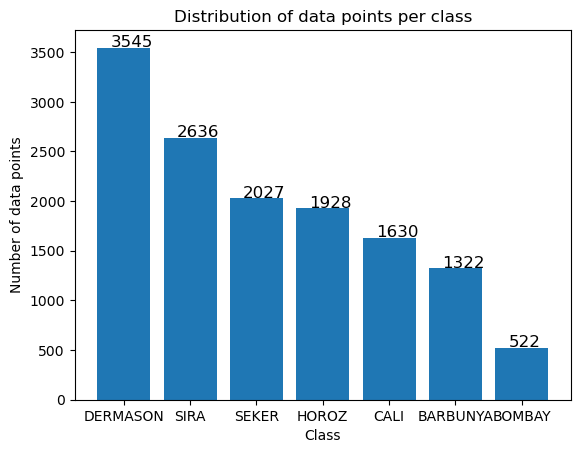

In [33]:
import matplotlib.pyplot as plt

# Count the number of data points per class
class_counts = df['Class'].value_counts()

# Plot the distribution of data points per class
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of data points')
plt.title('Distribution of data points per class')

# Add the number of data points per class as a label on top of each bar
for i in range(len(class_counts)):
    plt.text(x = i-0.2 , y = class_counts.values[i]+10, s = class_counts.values[i], size = 12)

plt.show()

In [35]:
# Define the number of folds
n_folds = 10

# Define the KFold object
kf = KFold(n_splits=n_folds)

# Creating a dataframe to store the results
results_df = pd.DataFrame(columns=['iteration', 'RFC_accuracy', 'RFC_precision', 'KNN_accuracy', 'KNN_precision', 'acc_difference','pre_difference'])

# Loop through the folds
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Get the train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest Classifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    rfc_accuracy = accuracy_score(y_test, rfc.predict(X_test))
    rfc_precision = precision_score(y_test, rfc.predict(X_test),average='weighted')
    
    # Train the K-Nearest Neighbors Classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
    knn_precision = precision_score(y_test, knn.predict(X_test),average='weighted')
    
    # Append the results to the dataframe
    results_df = results_df.append({'iteration': i+1, 'RFC_accuracy': rfc_accuracy, 'RFC_precision': rfc_precision, 'KNN_accuracy': knn_accuracy, 'KNN_precision': knn_precision, 'acc_difference': rfc_accuracy-knn_accuracy, 'pre_difference':rfc_precision-knn_precision}, ignore_index=True)
    
# Printing the table of accuracy and precision
print(results_df)

   iteration  RFC_accuracy  RFC_precision  KNN_accuracy  KNN_precision  \
0        1.0      0.922116       0.922241      0.722998       0.720830   
1        2.0      0.927259       0.927514      0.731080       0.732582   
2        3.0      0.925055       0.925398      0.730345       0.729447   
3        4.0      0.921381       0.921510      0.734754       0.735663   
4        5.0      0.923586       0.924295      0.737693       0.741104   
5        6.0      0.937546       0.937653      0.736223       0.737892   
6        7.0      0.925055       0.925599      0.735489       0.739672   
7        8.0      0.927994       0.928183      0.711242       0.709410   
8        9.0      0.922116       0.922062      0.711976       0.715279   
9       10.0      0.929464       0.929372      0.742836       0.742984   

   acc_difference  pre_difference  
0        0.199118        0.201411  
1        0.196179        0.194932  
2        0.194710        0.195951  
3        0.186627        0.185847  
4    

In [26]:
import pandas as pd

# Convert the numpy arrays to pandas dataframes
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Define the number of folds
n_folds = 10

# Define the KFold object
kf = KFold(n_splits=n_folds)

# Creating a dataframe to store the results
results_df = pd.DataFrame(columns=['iteration', 'RFC_accuracy', 'RFC_precision', 'KNN_accuracy', 'KNN_precision', 'diff_acc', 'diff_pre'])

# Loop through the folds
rfc_accuracy_scores = []
rfc_precision_scores = []
knn_accuracy_scores = []
knn_precision_scores = []

# Loop through the folds8
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Get the train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest Classifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    rfc_accuracy.append(accuracy_score(y_test, rfc.predict(X_test)))
    rfc_precision.append(precision_score(y_test, rfc.predict(X_test),average='weighted'))
    
    # Train the K-Nearest Neighbors Classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))
    knn_precision.append(precision_score(y_test, knn.predict(X_test),average='weighted'))
    
    # Append the results to the dataframe
    results_df = results_df.append({'iteration': i+1, 'RFC_accuracy': rfc_accuracy, 'RFC_precision': rfc_precision, 'KNN_accuracy': knn_accuracy, 'KNN_precision': knn_precision, 'difference_acc': rfc_accuracy-knn_accuracy, 'difference_pre': rfc_precision-knn_precision}, ignore_index=True)

# Printing the table of accuracy and precision
print(results_df)

ValueError: DataFrame constructor not properly called!

In [41]:
rfc_mean_accuracy = np.mean(rfc_accuracy)
knn_mean_accuracy = np.mean(knn_accuracy)
rfc_mean_precision = np.mean(rfc_precision)
knn_mean_precision = np.mean(knn_precision)
d_bar_acc = np.mean(rfc_accuracy-knn_accuracy)
d_bar_pre = np.mean(rfc_precision-knn_precision)

# Printing the average accuracy
print("Random Forest Classifier Mean Accuracy:", rfc_mean_accuracy)
print("K-Nearest Neighbors Classifier Mean Accuracy:", knn_mean_accuracy)

# Printing the average precision
print("Random Forest Classifier Mean Precision:", rfc_mean_precision)
print("K-Nearest Neighbors Classifier Mean Precision:", knn_mean_precision)

d_bar_acc

Random Forest Classifier Mean Accuracy: 0.9294636296840558
K-Nearest Neighbors Classifier Mean Accuracy: 0.742836149889787
Random Forest Classifier Mean Precision: 0.9293723246696797
K-Nearest Neighbors Classifier Mean Precision: 0.7429842465888329


0.18662747979426886

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

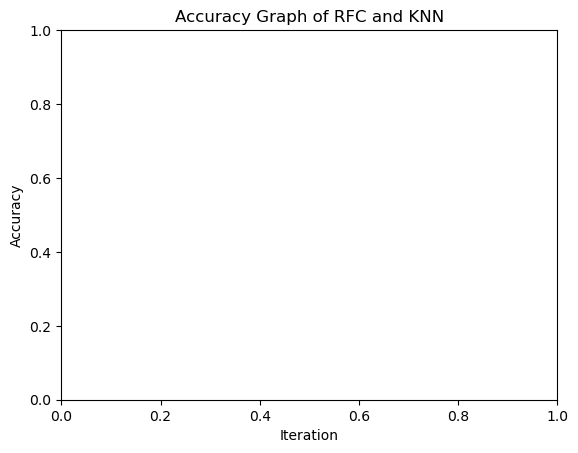

In [38]:
from scipy.stats import t
import numpy as np

#Compute the mean of differences
d_bar_acc = np.mean(difference_acc)
d_bar_pre = np.mean(difference_pre)
#compute the variance of differences
sigma2_acc = np.var(diff_acc)
sigma2_pre = np.var(diff_pre)
#compute the number of data points used for training 
n1 = 9*(df.shape[0])/10
#compute the number of data points used for validating
n2 = (df.shape[0])/10
#compute the total number of data points
n = df.shape[0]
#compute the modified variance
sigma2_mod_acc = sigma2_acc * (1/n + n2/n1)
sigma2_mod_pre = sigma2_pre * (1/n + n2/n1)
#compute the t_static
t_static_acc =  d_bar / np.sqrt(sigma2_mod_acc)
t_static_pre =  d_bar / np.sqrt(sigma2_mod_pre)


#Compute p-value and plot the results 
Pvalue_acc = ((1 - t.cdf(t_static_acc, n-1))*200)
Pvalue_pre = ((1 - t.cdf(t_static_pre, n-1))*200)
print("p-value for accuracy:", Pvalue_acc)
print("p-value for precision:", Pvalue_pre)

NameError: name 'difference_acc' is not defined

1361.0